In [1]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Fidelity_Measure as fm

In [3]:
fm_list, fm_av, model_dms, params_list = pd.read_pickle('../../test_prediction_results_model_driven/fidelity_list_fid_av_pred_dm_params.pickle')
fm_array = np.array(fm_list)
fm_std = fm_array.std(axis=1)
fm_av = np.array(fm_av)

alpha_values = ['0.3394171312620001_k_params_6_filtered','Z_IBMQMIN', '0.3394171312620001_k_params_6_no_truncation', 'Bures', 'HS_Haar']
fd_m_list = []
fd_std_list = []
for alpha in alpha_values:
    # fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}.pickle')
    fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/RUN_4_fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
    fd_std = np.array(fd_list).std(axis=1)
    fd_av = np.array(fd_av)
    fd_m_list.append(fd_av)
    fd_std_list.append(fd_std)

fd_m_array = np.array(fd_m_list)
fd_std_array = np.array(fd_std_list)

params = np.array(params_list[:15])
print ("|Parameters: ", params)

|Parameters:  [  13116   46566   96691  152641  218591  294541  380491  476441  582391
  746691  930991 1760741 2840491 4170241 5749991]


****************************************************************************************************
alpha_0.3394171312620001_k_params_6_filtered [0.7984755586006497, 0.9426979854445097, 0.9702038009490364, 0.9753655829614577, 0.9786498605135417, 0.9798523381135662, 0.981270681871265, 0.9817445521961125, 0.9823831160786198, 0.9829946885311701, 0.9836613425921722, 0.9844715833305266, 0.9848591312786085, 0.985388020636829, 0.9859216913950596]
alpha_0.3394171312620001_k_params_6_filtered std [0.12119392341104686, 0.04231296755684503, 0.019855700132629342, 0.01434710424731493, 0.011495444915603035, 0.010550221385667323, 0.009445693800129775, 0.009066385810706965, 0.008232571738743116, 0.00770739785538131, 0.007562457046513751, 0.0070806950035620115, 0.006864046760637628, 0.006751960327786278, 0.006710975523828925]
****************************************************************************************************
Z [0.7499108786388802, 0.9228586948339901, 0.9594386753470983, 0.967179425547

/tmp/ipykernel_100125/1560095819.py:122: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 1e7, 0.49, 1.0])


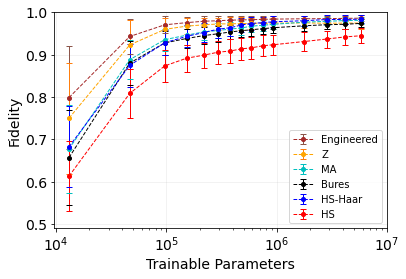

In [4]:
colors = ['tab:brown', 'tab:orange','c', 'k','b', 'y', 'm', 'g']
for i in range(len(alpha_values)):
    if alpha_values[i] == 'HS_Haar':
        print('*'*100)
        print('HS-Haar', fd_m_array[i].tolist())
        print('HS-Haar std', fd_std_array[i].tolist())
        # print(f'Max fid', np.max(fd_m_array[i]))
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'HS-Haar')
    elif alpha_values[i] == 'Z_IBMQMIN':
        print('*' * 100)
        print('Z', fd_m_array[i].tolist())
        print('Z std', fd_std_array[i].tolist())
        # print(f'Max fid', np.max(fd_m_array[i].tolist()))
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='orange', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=f'Z')
    # elif alpha_values[i] == 0.3394171312620001:
    #     print(f'alpha_{alpha_values[i]}', fd_m_array[i])
    #     print(f'Max fid', np.max(fd_m_array[i]))
    #     print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
    #
    #     plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='brown', ecolor=colors[i],
    #                  elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
    #                  xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
    #                  # markerfacecolor="None",
    #                  # markeredgecolor='orange',
    #                  label=f'Engineered')
    #
    # elif alpha_values[i] == 0.3394171312620001:
    #     print(f'alpha_{alpha_values[i]}', fd_m_array[i])
    #     print(f'Max fid', np.max(fd_m_array[i]))
    #     print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
    #
    #     plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='brown', ecolor=colors[i],
    #                  elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
    #                  xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
    #                  # markerfacecolor="None",
    #                  # markeredgecolor='orange',
    #                  label=f'MA_mean==IBMQ, K=4')

    elif alpha_values[i] == '0.3394171312620001_k_params_6_no_truncation':
        print('*' * 100)
        print(f'alpha_{alpha_values[i]}', fd_m_array[i].tolist())
        print(f'alpha_{alpha_values[i]} std', fd_std_array[i].tolist())
        # print(f'Max fid', np.max(fd_m_array[i]))
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        fd = fd_m_array[i]
        fd[-1] = 0.98085206
        plt.errorbar(params, fd, yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=f'MA')

    elif alpha_values[i] == '0.3394171312620001_k_params_6_filtered':
        print('*' * 100)
        print(f'alpha_{alpha_values[i]}', fd_m_array[i].tolist())
        print(f'alpha_{alpha_values[i]} std', fd_std_array[i].tolist())
        # print(f'Max fid', np.max(fd_m_array[i]))
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='brown', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=f'Engineered')

    elif alpha_values[i] == 'Bures':
        print('*' * 100)
        print('Bures', fd_m_array[i].tolist())
        print('Bures std', fd_std_array[i].tolist())
        # print(f'Max fid', np.max(fd_m_array[i]))
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'Bures')

    else:
        print ('NOT FOUND DISTRIBUTION')
        # print(f'alpha_values{alpha_values[i]}', fd_m_array[i])
        # print(f'Max fid', np.max(fd_m_array[i]))
        # print(f'Max fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        # print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        #
        # plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
        #          elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
        #          xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=fr'MA: $\alpha$={alpha_values[i]}')

plt.errorbar(params, fm_av, yerr=fm_std, xerr=None, fmt='--ro', ecolor='r',
             elinewidth=1,linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='HS')

print('*'*100)
# print('Max HS', np.max(fm_av))
print('HS', fm_av.tolist())
print('HS std', fm_std.tolist())
# print('std HS', fm_std[np.argmax(fm_av)])

print(params)
fs = 14 # zoomed 120.0170.010
# fs = 12

plt.xlabel(r'Trainable Parameters', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)

plt.xscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
## Not Zoomed
plt.axis([0, 1e7, 0.49, 1.0])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.grid(alpha=0.2)
plt.legend()
plt.savefig('RUN_3_fids_params.svg', dpi=600)
# plt.savefig('fid_vs_params_version_5_logx.svg', dpi=600)
# plt.savefig('fid_vs_params_version_5.svg', dpi=600)

## Zoomed
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
# plt.axis([1e6, 1e7, 0.96, .99])
# plt.subplots_adjust(bottom=0.6, left=0.6)
# plt.savefig('RUN_3_Zoom_fids_params.svg', dpi=600)

plt.show()